In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pygmt

%reload_ext autoreload
%autoreload 2
import classes_functions.plot_FM as plot_FM


sk = './SKHASH2/SKHASH/examples/maacama_SKHASH_MTJ'
plot_dir = f"{sk}/OUT/plot_stn_fm"
os.makedirs(plot_dir, exist_ok=True)

# read skhash focal mechanism solution file
skhash_out_file = f'{sk}/OUT/out_pyrocko.csv'
sk_pol_file = f"{sk}/IN/pol_concensus_pyroko.csv"
# sta inventory file
sta_inv_file = f'../data/eq_data/3_station_catalogs/00_station_inventory_master_cleaned.txt'

# read the focal mechanism solution file
fm_df = plot_FM.get_FM_params(skhash_out_file)
fm_df

,event_id,strike,dip,rake,quality,fault_plane_uncertainty,aux_plane_uncertainty,num_p_pol,num_sp_ratios,polarity_misfit,prob_mech,sta_distribution_ratio,sp_misfit,mult_solution_flag
0,nc40216664,130.9300,56.8023,-109.8444,B,17.8461,16.6332,44,0,13.1,98.0,46.2,0.0,False
1,nc72189495,210.9831,29.2672,-97.3395,B,26.1067,22.3387,42,0,19.3,87.9,42.8,0.0,False
2,nc71919066,203.0486,15.4329,-28.5645,B,15.3859,21.2092,50,0,19.1,96.3,41.9,0.0,False
3,nc71634355,344.3990,74.9414,-155.1548,B,26.7213,31.5321,31,0,5.6,75.6,40.1,0.0,False
4,nc73783911,120.4748,65.5037,-129.7833,B,25.6663,29.9460,58,0,15.7,73.4,80.2,0.0,False
5,nc73024816,344.8646,60.8140,-135.1819,B,18.7787,16.6849,43,0,14.7,98.8,42.4,0.0,False
6,nc72378641,268.2538,9.7085,12.1019,B,28.8060,29.5515,62,0,19.5,68.2,62.5,0.0,True
7,nc51207076,53.2179,1.4194,154.8638,B,27.4854,27.9350,31,0,11.6,83.0,74.2,0.0,False
8,nc40221138,127.8703,89.5752,171.4434,B,26.1265,28.0734,47,0,17.6,78.8,59.5,0.0,False
9,nc73118836,336.0575,36.5963,-119.7754,C,14.8115,14.9605,46,0,25.0,99.4,40.6,0.0,False


Plotting event: nc40216664


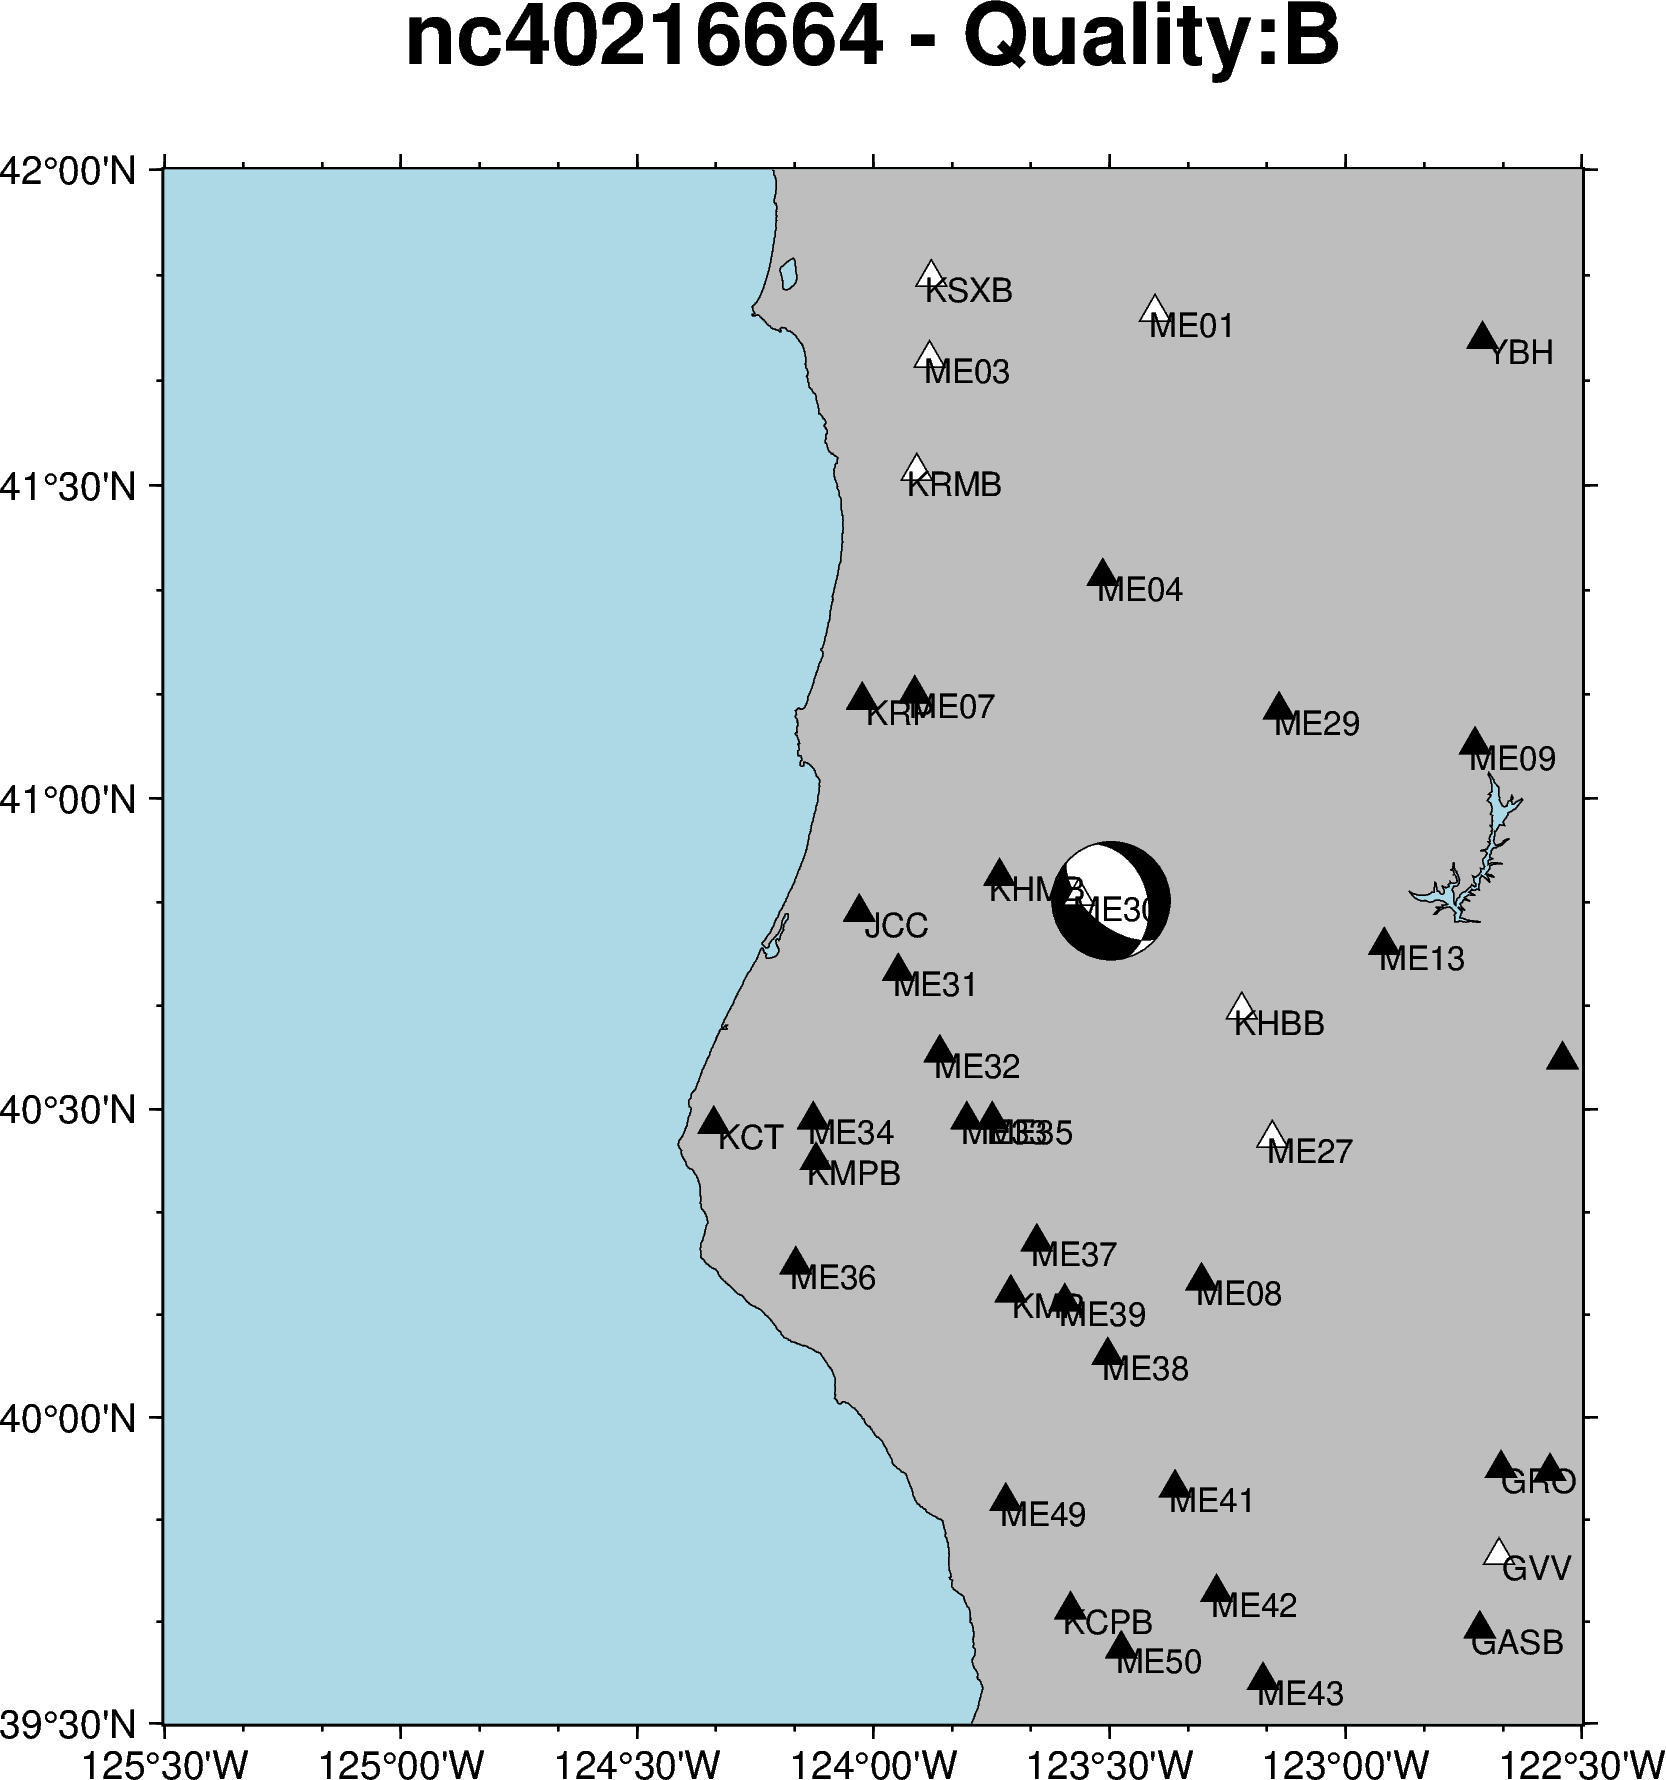

Plotting event: nc72189495


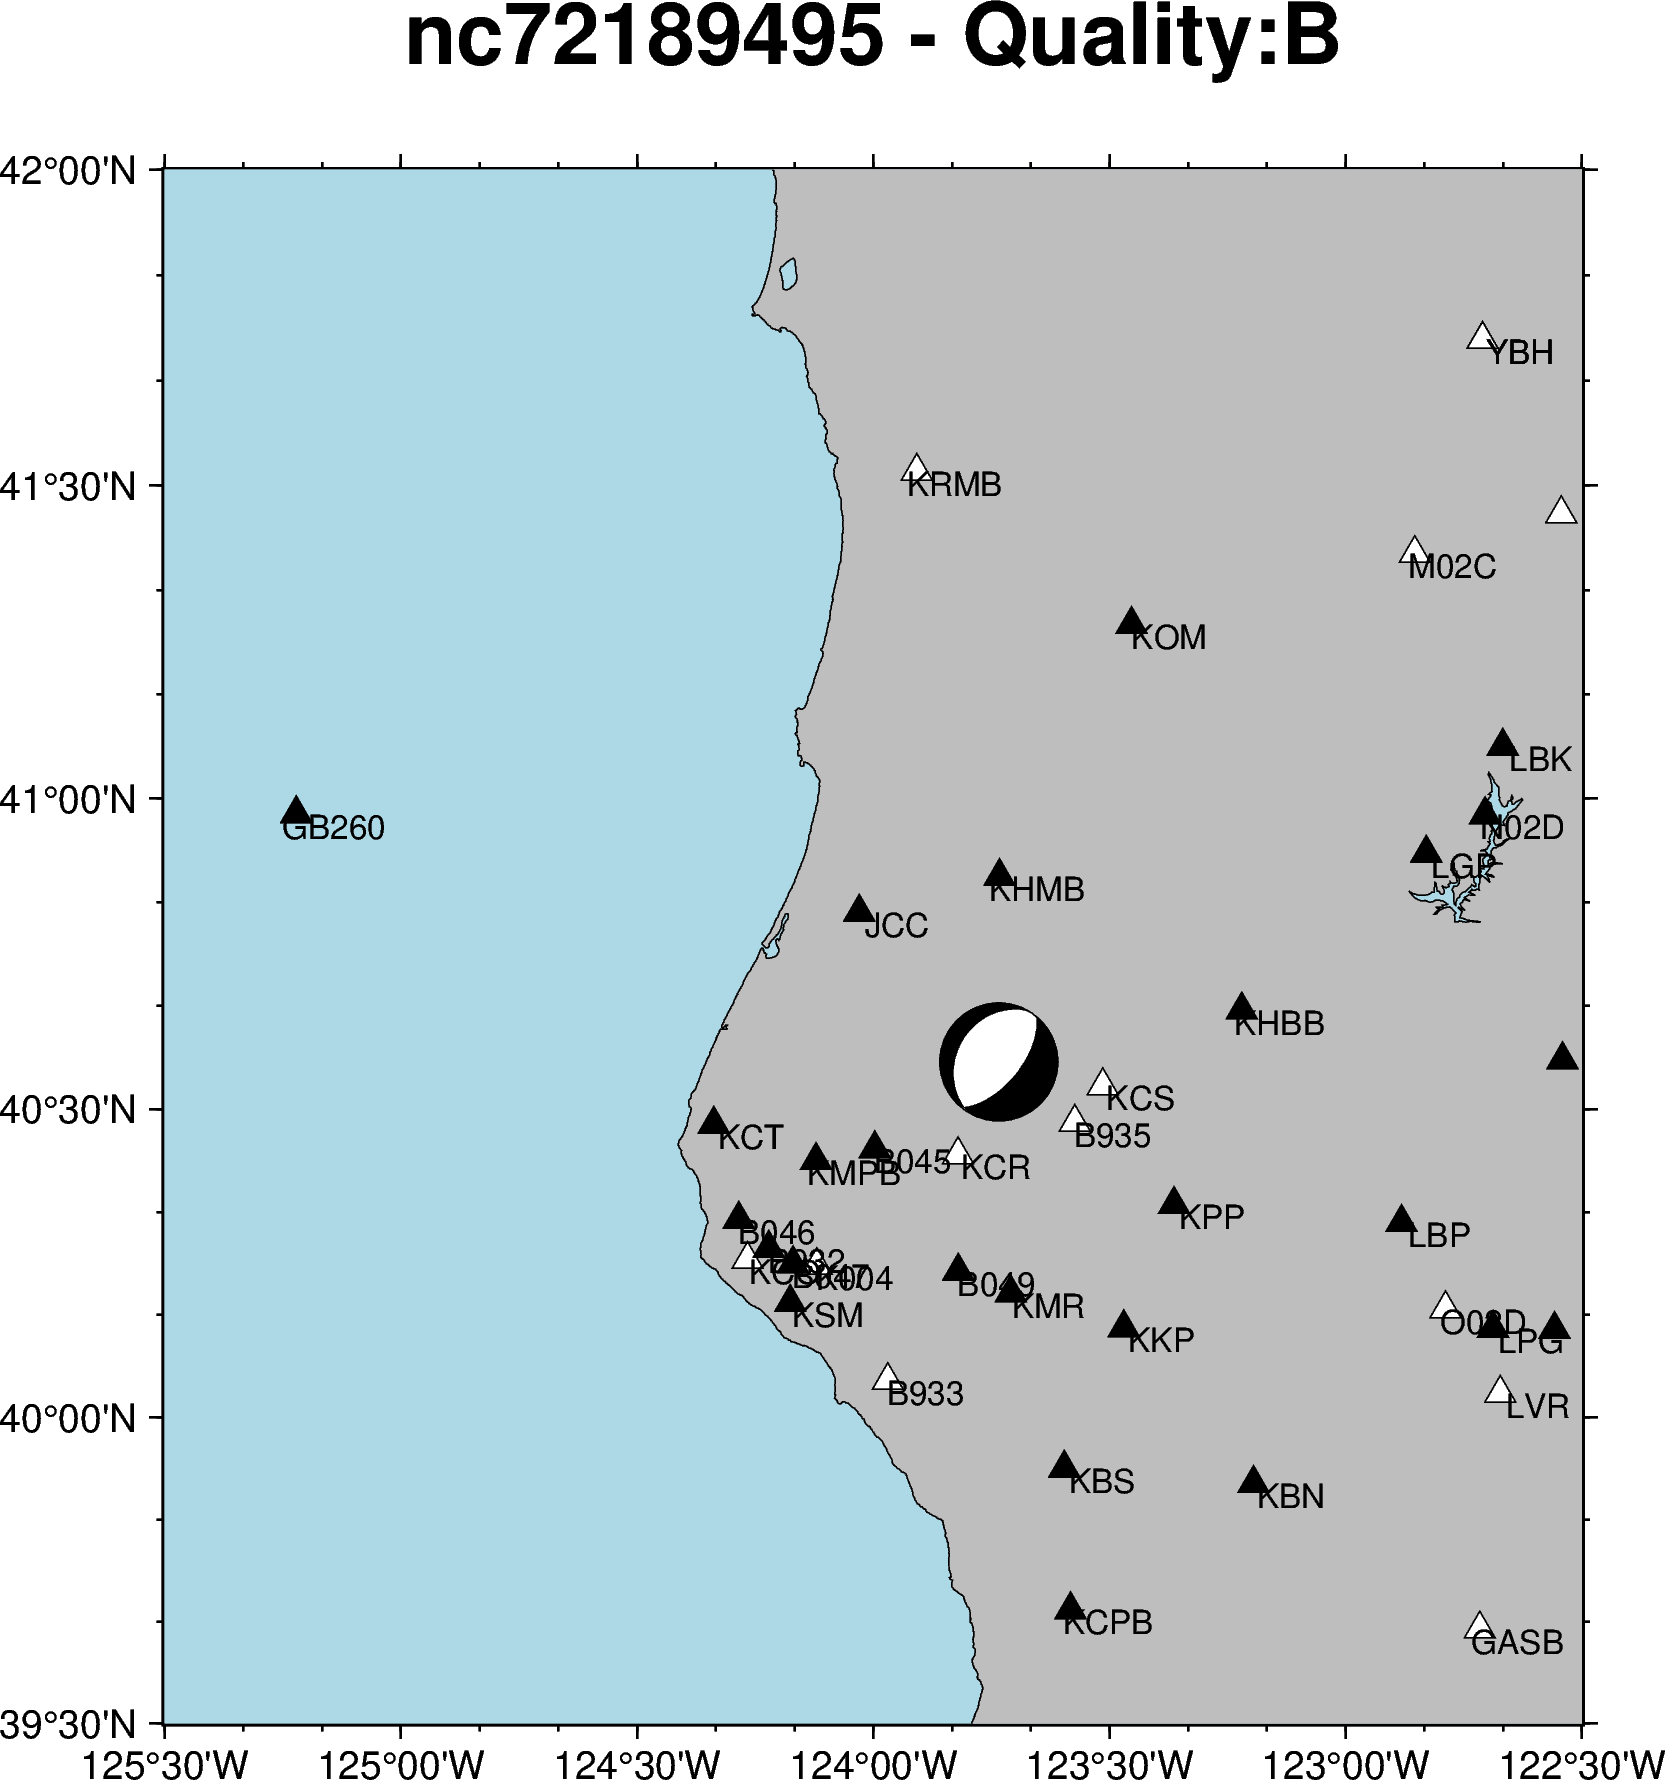

Plotting event: nc71919066


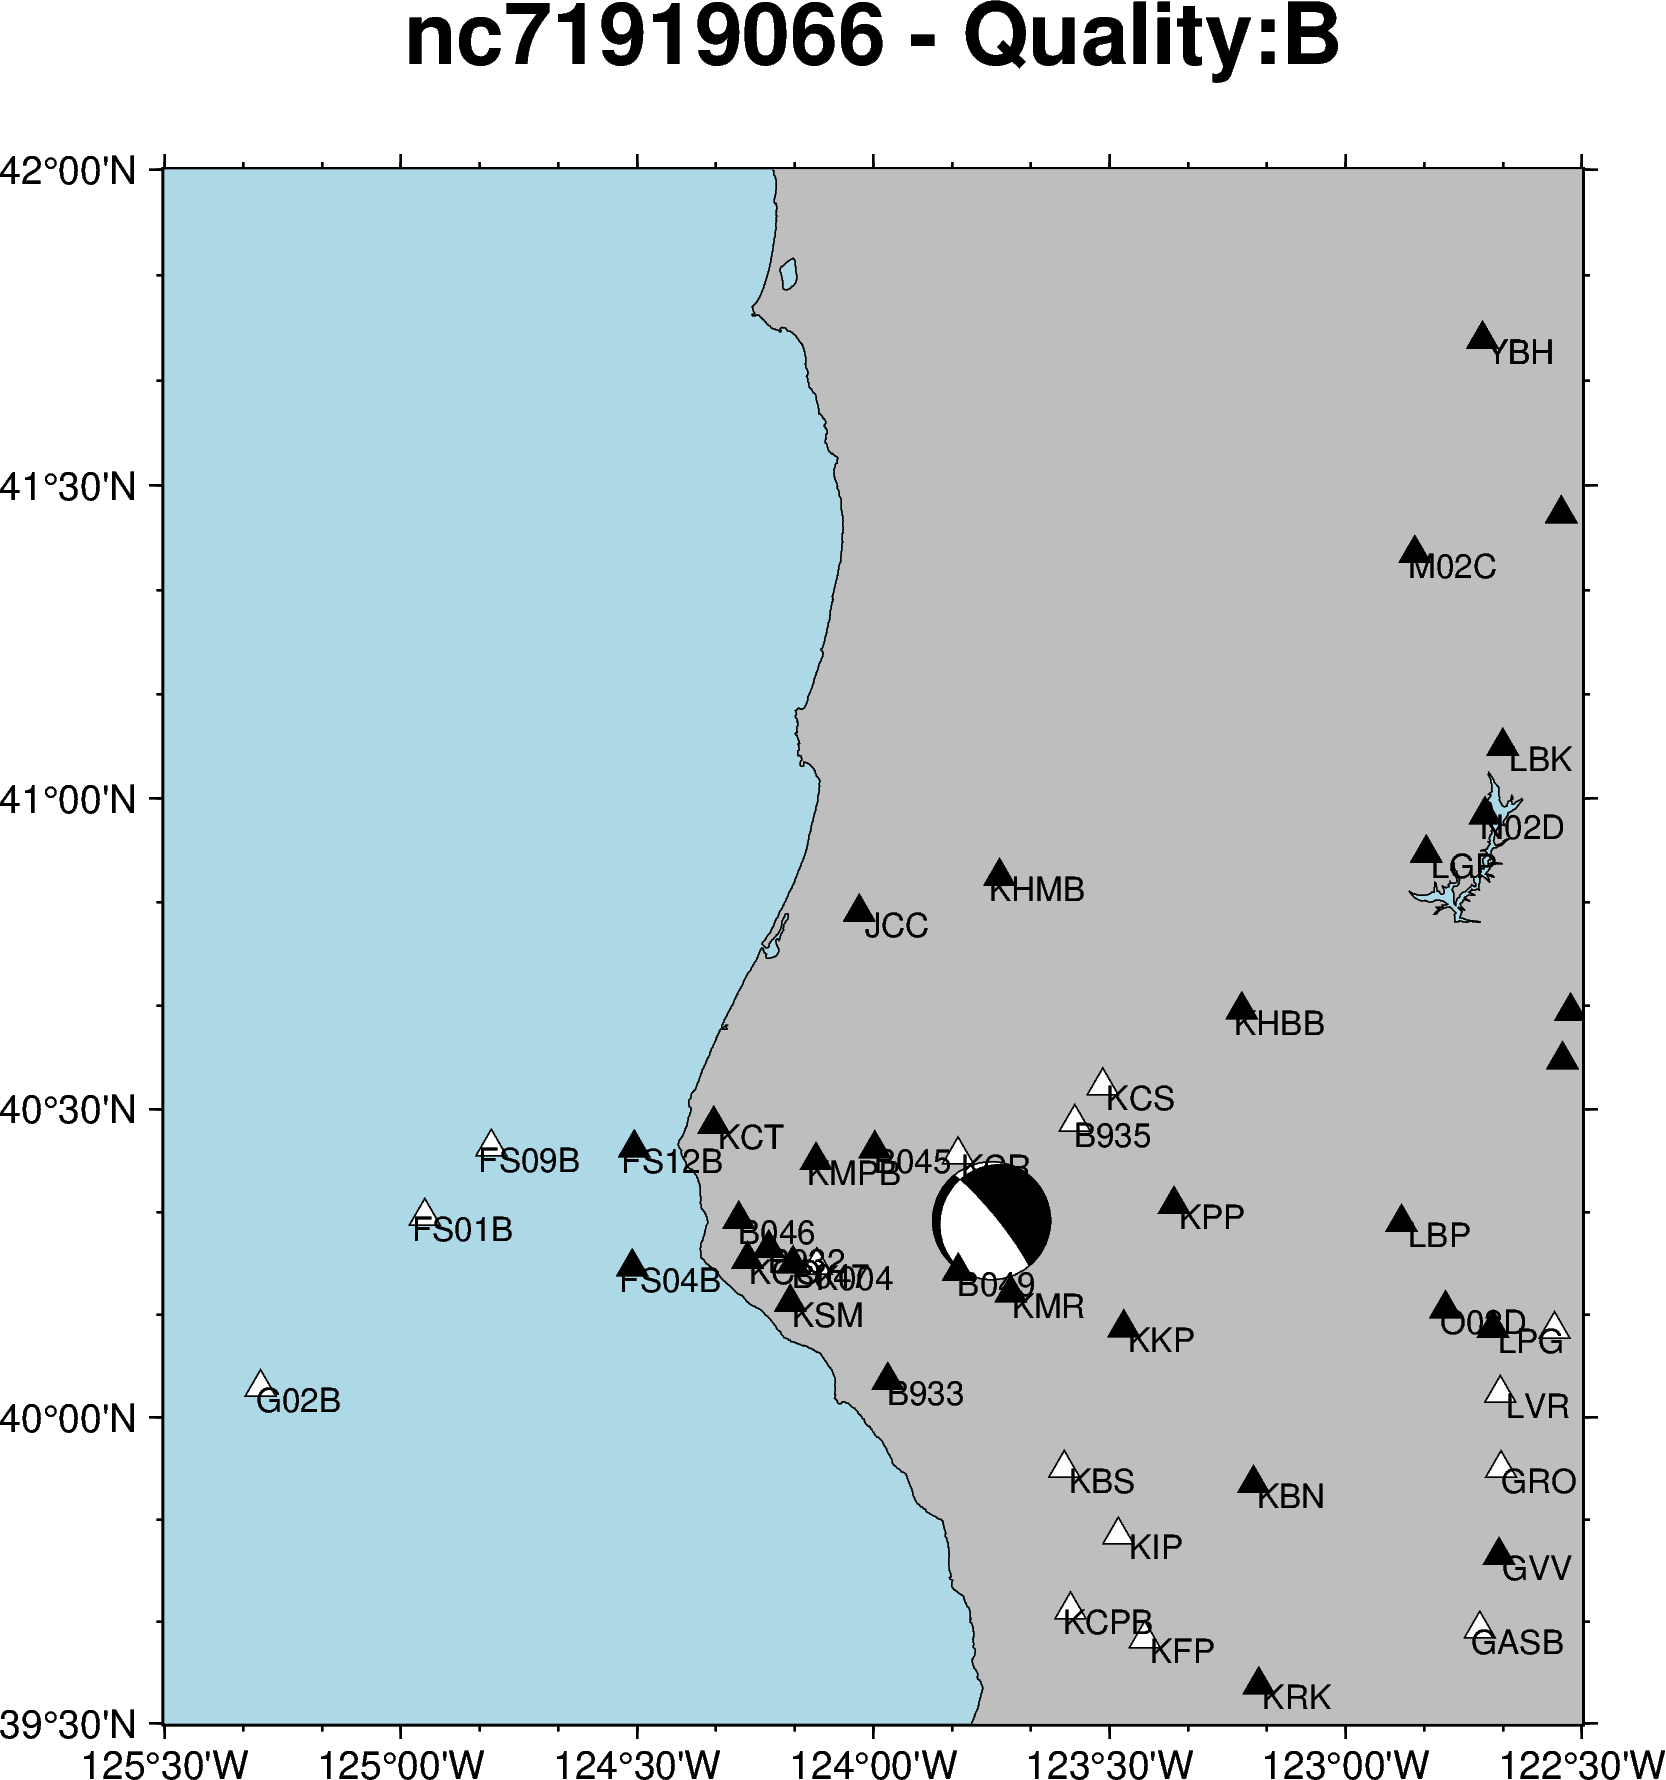

Plotting event: nc71634355


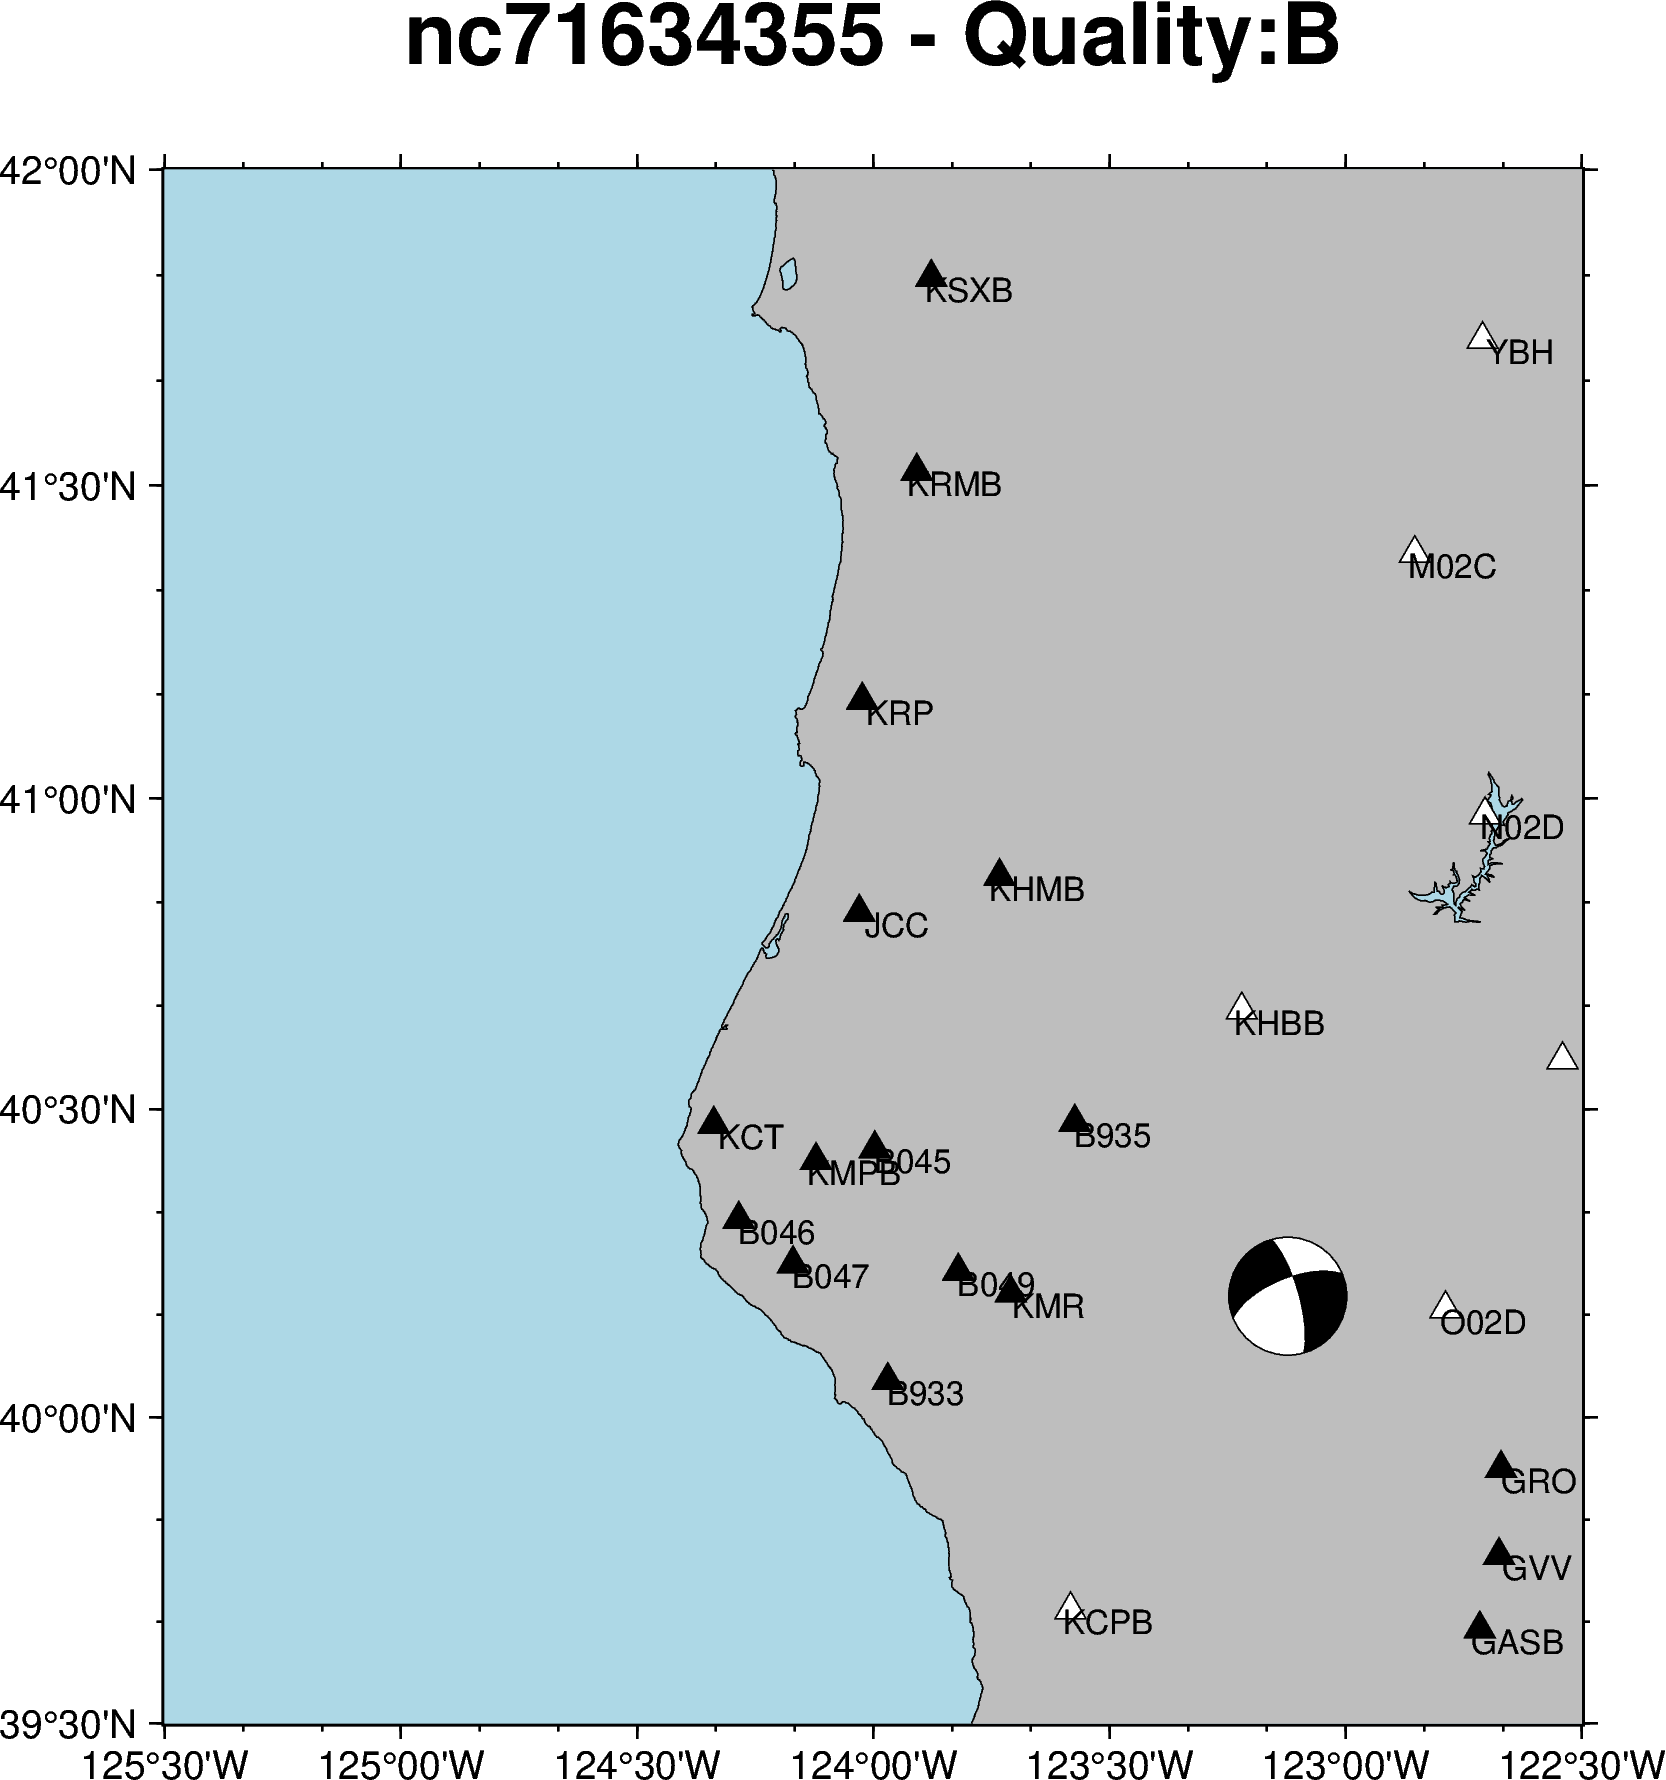

Plotting event: nc73783911


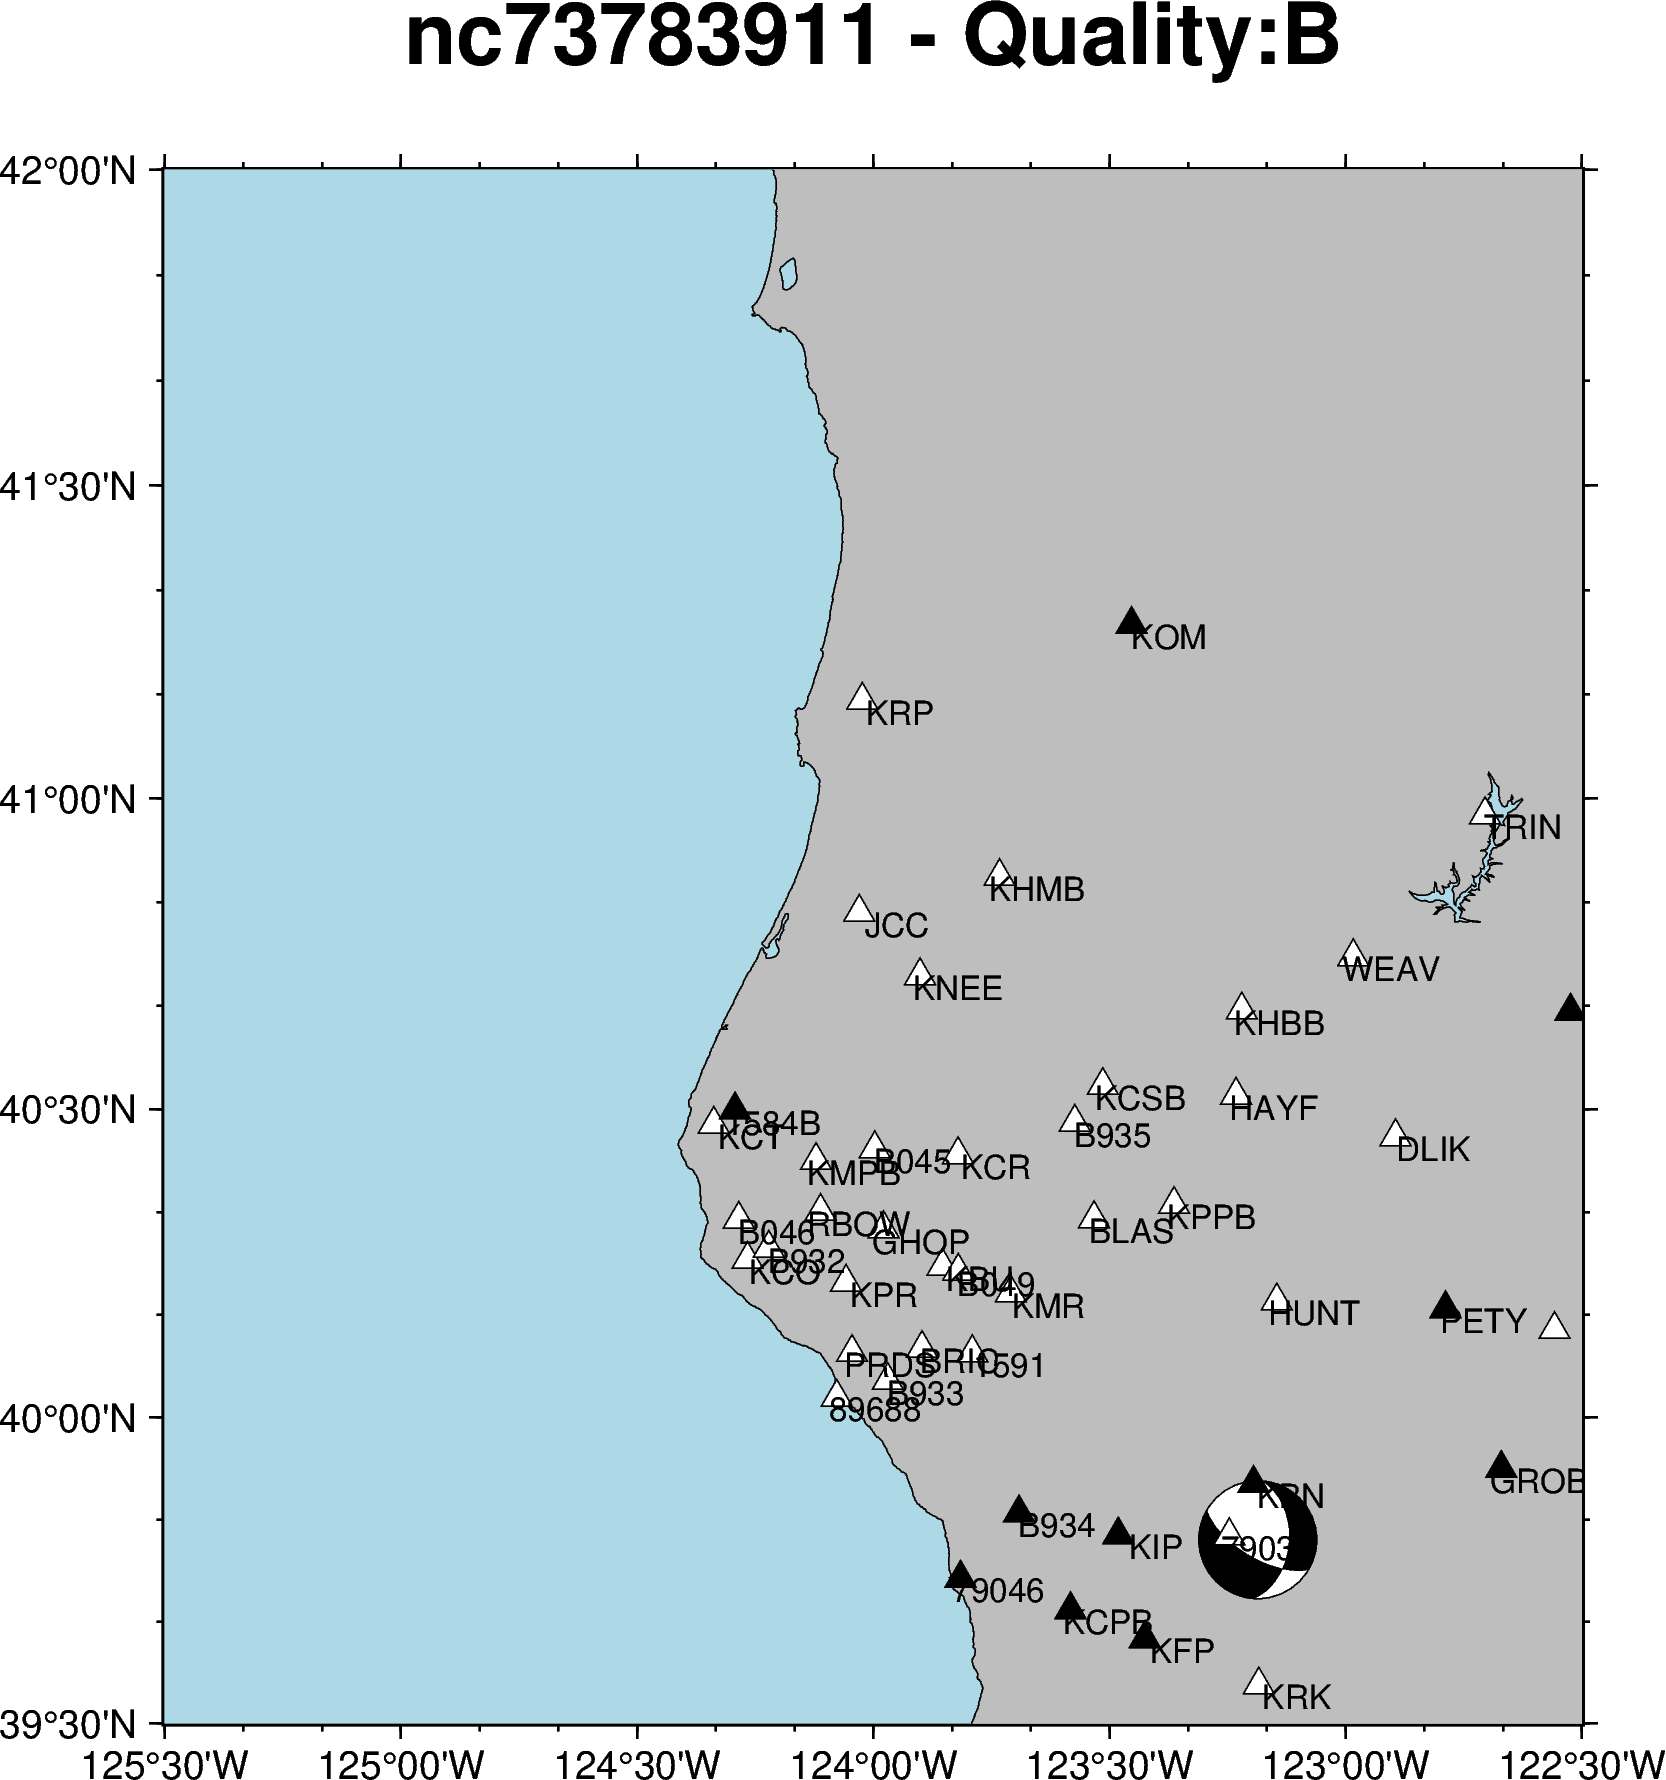

Plotting event: nc73024816


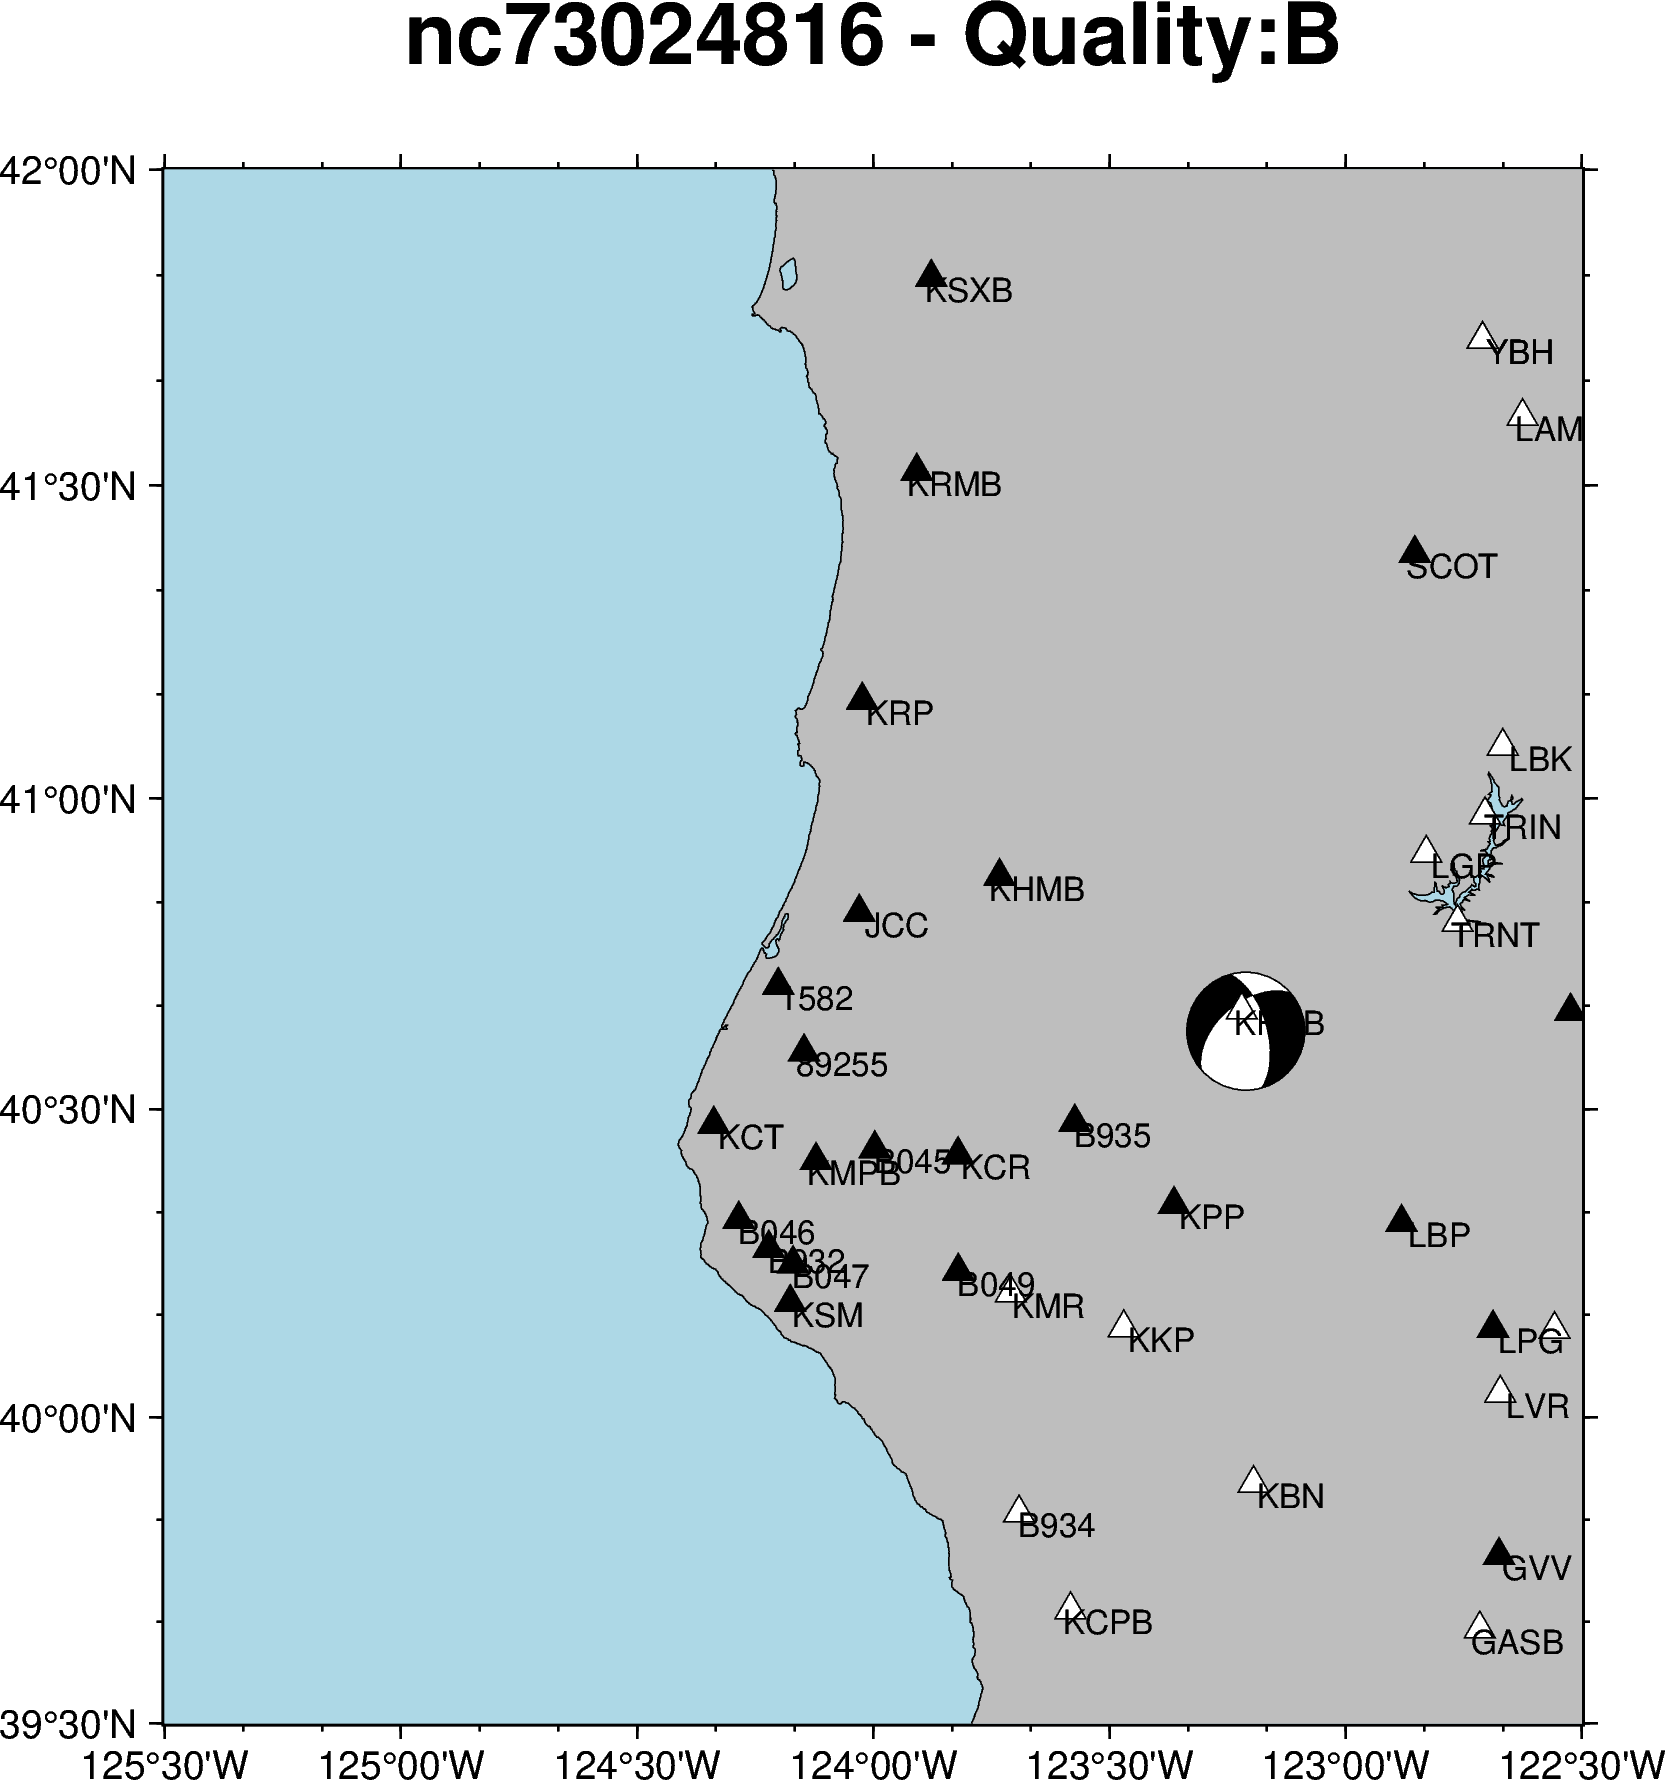

Plotting event: nc72378641


In [3]:
for i in range(len(fm_df)):
    # select an event with a solution
    event_id = fm_df.event_id[i]
    # if event_id != 'nc71888456': 
    #     continue
    print(f"Plotting event: {event_id}")

    # read the station polarity file and get the event location
    event_sta_pol_df, elat, elon, edep = plot_FM.get_sta_lat_lon_pol(event_id, sk_pol_file, sta_inv_file)

    # get the focal mechanism parameters
    strike, dip, rake, fqual, _ = plot_FM.get_FM_params(skhash_out_file, event_id)

    # plot the focal mechanism solution
    fig = plot_FM.plot_FM_stations(event_id, event_sta_pol_df, 
        elat, elon, edep,
        strike, dip, rake,
        region=[-125.5, -122.5, 39.5, 42]
    )
    fig.basemap(frame=[f"+t{event_id} - Quality:{fqual}"])
    fig.savefig(f"{plot_dir}/{event_id}.png")

    # if i > 5: # make a few plots
    #     break 

fig.show()